# AutoRec cs3639 Recommendation Systems course IDC

## Q1:<br>
We chose to focus on the paper -'AutoRec: Autoencoders Meet Collaborative Filtering'.
This paper proposes AutoRec, a new CF model based on the autoencoder paradigm. The idea came from the
successes of (deep) neural network models for vision and speech tasks.
The main objective of the paper is to show that AutoRec has representational and computational advantages over existing neural
approaches to CF and demonstrate empirically that it outperforms the current state-of-the-art methods.
The approach presented in the paper is to learn a model so that the output is as close as possible to the input,
and make sure that the square error is minimum.
In fact, AutoRec main approach is to study vector representation of original input.
from input layer->hidden layer the process is the process of encode, from hidden layer->output layer it's a decode process.
this process should create a model that can reconstruct the original data to the maximum extent. The approach came from 'AutoEncoders'
that is an unsupervised cluster


## Q2:<br>
A further work which may improve significant is to make Deep AutoRec. the model should contain at least 3 layers (500,250,500),
            but definitely could be more( like in this paper-'https://arxiv.org/abs/1708.01715').
            Another suggestion would be  use of regularization techniques such as dropout is necessary to prevent over-fiting


In [47]:
import numpy as np
import pandas as pd
import torch
import json
from time import time
from utils.plots import plot_train_history
from utils.models_results import models_results

In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


## datasets

In this project, we will use 2 datasets:
* **movielens**, which can be downloaded using `utils.datasets_download.py` or straight from [here](http://files.grouplens.org/datasets/movielens/).
* **netflixprize**, which can be downloaded from this [semi-parsed version from kaggle](https://www.kaggle.com/netflix-inc/netflix-prize-data) or from this [raw version](https://archive.org/download/nf_prize_dataset.tar)

**NOTE**: for the notebook to run properly, you should save you dataset under `data` folder and `movielens` folder for the movielens dataset and `netflix` folder for the netflixprize dataset.
i.e `data/movielens` folder and `data/netflix` folder respectively.

# Matrix Factorization

In [50]:
from src.mf.model import MatrixFactorization
from src.mf.training import MFTrainer

In [51]:
from src.data_prep import movielens_load_100k
train, test = movielens_load_100k(1)
print(train.shape)
train

(80000, 4)


,user_id,item_id,rating,timestamp
0,0,0,5,874965758
1,0,1,3,876893171
2,0,2,4,878542960
3,0,3,3,876893119
4,0,4,3,889751712
...,...,...,...,...
79995,942,1066,2,875501756
79996,942,1073,4,888640250
79997,942,1187,3,888640250
79998,942,1227,3,888640275


In [52]:
# If you wish to find hyper params run `mf_hyper_params` with `find=True`
# It will save the params and losses to models_params folder
# Otherwise it will return a df with the already run models

epochs = 60
batch_size = 64

def mf_hyper_params(find=False):
    if find:
        for k in [10, 15, 20, 50, 100]:
            for lr in [0.001, 0.003, 0.005]:
                for reg in [0.001, 0.003, 0.005]:
                    print(f'STARTING TRAIN MF with k: {k}, lr: {lr}, reg: {reg}')
                    start_time = time()
                    model_dict = {}
                    num_users = train.user_id.max() + 1
                    num_items = train.item_id.max() + 1

                    # Init model and trainer
                    model = MatrixFactorization(num_users, num_items, k=k)
                    mf_trainer = MFTrainer(train, test, model, epochs=epochs, lr=lr, reg=reg, batch_size=batch_size)

                    # Train
                    mf_trainer.train_model()

                    # Save parmas to model_dict
                    model_dict['model_params'] = model.params()
                    model_dict.update(mf_trainer.params())
                    model_dict['train_losses'] = mf_trainer.train_losses
                    model_dict['val_losses'] = mf_trainer.val_losses

                    # Save model params to json file
                    file_name = f'models_params/MF_{k}_{lr}_{reg}'
                    with open(file_name, 'w') as f:
                        json.dump(model_dict, f, indent=4)

                    plot_train_history(mf_trainer.train_losses, mf_trainer.val_losses)
                    print(f'model train time: {time() - start_time:.3f}\n')
        return
    else:
        return models_results('MF')


In [53]:
# mf_results = mf_hyper_params(True)

In [54]:
mf_results = mf_hyper_params(False)
mf_results.sort_values(by='val_loss')

,model_name,train_loss,val_loss,params
9,MF_10_0.001_0.001,2.070330,2.252434,"{'model_params': {'k': 10}, 'seed': 14, 'epoch..."
18,MF_15_0.001_0.001,2.072956,2.254183,"{'model_params': {'k': 15}, 'seed': 14, 'epoch..."
27,MF_20_0.001_0.001,2.074550,2.255035,"{'model_params': {'k': 20}, 'seed': 14, 'epoch..."
36,MF_50_0.001_0.001,2.081092,2.259130,"{'model_params': {'k': 50}, 'seed': 14, 'epoch..."
0,MF_100_0.001_0.001,2.085245,2.261896,"{'model_params': {'k': 100}, 'seed': 14, 'epoc..."
12,MF_10_0.003_0.001,2.087885,2.263649,"{'model_params': {'k': 10}, 'seed': 14, 'epoch..."
21,MF_15_0.003_0.001,2.088505,2.264293,"{'model_params': {'k': 15}, 'seed': 14, 'epoch..."
30,MF_20_0.003_0.001,2.091324,2.266042,"{'model_params': {'k': 20}, 'seed': 14, 'epoch..."
15,MF_10_0.005_0.001,2.092465,2.266833,"{'model_params': {'k': 10}, 'seed': 14, 'epoch..."
24,MF_15_0.005_0.001,2.093361,2.267727,"{'model_params': {'k': 15}, 'seed': 14, 'epoch..."


# AutoRec

In [55]:
from src.data_prep import movielens_create_ratings_100k
train, test = movielens_create_ratings_100k(1)
train

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5,3,4,3,3,0,4,1,5,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
939,0,0,0,2,0,0,4,5,3,0,...,0,0,0,0,0,0,0,0,0,0
940,5,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from src.autorec.model import AutoRec
from src.autorec.training import AutoRecTrainer

In [57]:
# If you wish to find hyper params run `autorec_hyper_params` with `find=True`
# It will save the params and losses to models_params folder
# Otherwise it will return a df with the already run models

epochs = 60
batch_size = 64


def autorec_hyper_params(find=False):
    if find:
        for num_hidden in [100, 200, 500, 600]:
            for lr in [0.001, 0.003, 0.005]:
                for reg in [0.001, 0.003, 0.005]:
                    print(f'STARTING TRAIN AutoRec with num_hidden: {num_hidden}, lr: {lr}, reg: {reg}')
                    start_time = time()
                    model_dict = {}

                    num_users, num_items = train.shape

                    # Init model and trainer
                    model = AutoRec(num_hidden=num_hidden, num_features=num_users)
                    autorec_trainer = AutoRecTrainer(train, test, model, epochs=epochs, batch_size=batch_size, lr=lr, reg=reg)

                    # Train
                    autorec_trainer.train_model()

                    # Save parmas to model_dict
                    model_dict['model_params'] = model.params()
                    model_dict.update(autorec_trainer.params())
                    model_dict['train_losses'] = autorec_trainer.train_losses
                    model_dict['val_losses'] = autorec_trainer.val_losses

                    # Save model params to json file
                    file_name = f'models_params/AutoRec_{num_hidden}_{lr}_{reg}'
                    with open(file_name, 'w') as f:
                        json.dump(model_dict, f, indent=4)

                    plot_train_history(autorec_trainer.train_losses, autorec_trainer.val_losses)
                    print(f'model train time: {time() - start_time:.3f}\n')
        return
    else:
        return models_results('AutoRec_')



In [58]:
# autorec_results = autorec_hyper_params(find=True)

In [59]:
autorec_results = autorec_hyper_params(find=False)
autorec_results.sort_values(by='val_loss')

,model_name,train_loss,val_loss,params
27,AutoRec_600_0.001_0.001,0.562352,1.070791,"{'model_params': {'num_hidden': 600}, 'seed': ..."
18,AutoRec_500_0.001_0.001,0.575954,1.078074,"{'model_params': {'num_hidden': 500}, 'seed': ..."
21,AutoRec_500_0.003_0.001,0.700022,1.093887,"{'model_params': {'num_hidden': 500}, 'seed': ..."
30,AutoRec_600_0.003_0.001,0.709172,1.115248,"{'model_params': {'num_hidden': 600}, 'seed': ..."
12,AutoRec_200_0.003_0.001,0.734199,1.115456,"{'model_params': {'num_hidden': 200}, 'seed': ..."
9,AutoRec_200_0.001_0.001,0.721868,1.117411,"{'model_params': {'num_hidden': 200}, 'seed': ..."
15,AutoRec_200_0.005_0.001,0.808713,1.120457,"{'model_params': {'num_hidden': 200}, 'seed': ..."
3,AutoRec_100_0.003_0.001,0.819192,1.147906,"{'model_params': {'num_hidden': 100}, 'seed': ..."
0,AutoRec_100_0.001_0.001,0.823927,1.148871,"{'model_params': {'num_hidden': 100}, 'seed': ..."
6,AutoRec_100_0.005_0.001,0.840435,1.163984,"{'model_params': {'num_hidden': 100}, 'seed': ..."


# AutoRecV2

In [61]:
from src.data_prep import movielens_create_ratings_100k
train, test = movielens_create_ratings_100k(1)
train

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5,3,4,3,3,0,4,1,5,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
939,0,0,0,2,0,0,4,5,3,0,...,0,0,0,0,0,0,0,0,0,0
940,5,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from src.autorecv2.model import AutoRecV2
from src.autorecv2.training import AutoRecV2Trainer

In [63]:
# If you wish to find hyper params run `autorec_hyper_params` with `find=True`
# It will save the params and losses to models_params folder
# Otherwise it will return a df with the already run models
from time import time

epochs = 60
batch_size = 64


def autorecv2_hyper_params(find=False):
    if find:
        for num_hidden in [256, 512, 650, 800]:
            for lr in [0.0005, 0.001]: #, 0.005]:
                for reg in [0.0005, 0.001]: #, 0.003]:
                    for dropout in [0, 0.05, 0.12, 0.2, 0.3, 0.4]:
                        print(f'STARTING TRAIN AutoRecV2 with num_hidden: {num_hidden}, lr: {lr}, reg: {reg}, dp: {dropout}')
                        start_time = time()
                        model_dict = {}

                        num_users, num_items = train.shape

                        # Init model and trainer
                        model = AutoRecV2(num_hidden=num_hidden, num_features=num_users, dropout=dropout)
                        autorec_trainer = AutoRecV2Trainer(train, test, model, epochs=epochs, batch_size=batch_size, lr=lr, reg=reg)

                        # Train
                        autorec_trainer.train_model()

                        # Save parmas to model_dict
                        model_dict['model_params'] = model.params()
                        model_dict.update(autorec_trainer.params())
                        model_dict['train_losses'] = autorec_trainer.train_losses
                        model_dict['val_losses'] = autorec_trainer.val_losses

                        # Save model params to json file
                        file_name = f'models_params/AutoRecV2_{num_hidden}_{lr}_{reg}'
                        with open(file_name, 'w') as f:
                            json.dump(model_dict, f, indent=4)

                        plot_train_history(autorec_trainer.train_losses, autorec_trainer.val_losses)
                        print(f'model train time: {time() - start_time:.3f}\n')
        return
    else:
        return models_results('AutoRecV2')


In [64]:
# autorecv2_hyper_params(find=True)

In [65]:
autorecv2_results = autorecv2_hyper_params(find=False)
autorecv2_results.sort_values(by='val_loss')

,model_name,train_loss,val_loss,params
12,AutoRecV2_800_0.0005_0.0005,0.521380,0.769009,"{'model_params': {'num_hidden': 800, 'dropout'..."
14,AutoRecV2_800_0.001_0.0005,0.487651,0.778057,"{'model_params': {'num_hidden': 800, 'dropout'..."
10,AutoRecV2_650_0.001_0.0005,0.512542,0.778519,"{'model_params': {'num_hidden': 650, 'dropout'..."
8,AutoRecV2_650_0.0005_0.0005,0.561104,0.779647,"{'model_params': {'num_hidden': 650, 'dropout'..."
6,AutoRecV2_512_0.001_0.0005,0.546447,0.792634,"{'model_params': {'num_hidden': 512, 'dropout'..."
4,AutoRecV2_512_0.0005_0.0005,0.606374,0.797822,"{'model_params': {'num_hidden': 512, 'dropout'..."
13,AutoRecV2_800_0.0005_0.001,0.694199,0.820141,"{'model_params': {'num_hidden': 800, 'dropout'..."
2,AutoRecV2_256_0.001_0.0005,0.678756,0.829820,"{'model_params': {'num_hidden': 256, 'dropout'..."
15,AutoRecV2_800_0.001_0.001,0.698225,0.833807,"{'model_params': {'num_hidden': 800, 'dropout'..."
9,AutoRecV2_650_0.0005_0.001,0.716994,0.834385,"{'model_params': {'num_hidden': 650, 'dropout'..."


# Compare

In [66]:
all_models = models_results()

In [67]:
all_models.sort_values(by='val_loss')

,model_name,train_loss,val_loss,params
93,AutoRecV2_800_0.0005_0.0005,0.521380,0.769009,"{'model_params': {'num_hidden': 800, 'dropout'..."
95,AutoRecV2_800_0.001_0.0005,0.487651,0.778057,"{'model_params': {'num_hidden': 800, 'dropout'..."
91,AutoRecV2_650_0.001_0.0005,0.512542,0.778519,"{'model_params': {'num_hidden': 650, 'dropout'..."
89,AutoRecV2_650_0.0005_0.0005,0.561104,0.779647,"{'model_params': {'num_hidden': 650, 'dropout'..."
87,AutoRecV2_512_0.001_0.0005,0.546447,0.792634,"{'model_params': {'num_hidden': 512, 'dropout'..."
...,...,...,...,...
31,MF_20_0.003_0.003,3.699376,3.716899,"{'model_params': {'k': 20}, 'seed': 14, 'epoch..."
40,MF_50_0.003_0.003,3.699376,3.716899,"{'model_params': {'k': 50}, 'seed': 14, 'epoch..."
25,MF_15_0.005_0.003,3.699376,3.716899,"{'model_params': {'k': 15}, 'seed': 14, 'epoch..."
4,MF_100_0.003_0.003,3.699376,3.716899,"{'model_params': {'k': 100}, 'seed': 14, 'epoc..."


In [68]:
best_df = pd.DataFrame(columns=all_models.columns)
for i, model_name in enumerate(['MF', 'AutoRec_', 'AutoRecV2']):
    temp = models_results(model_name)
    temp = temp.sort_values(by='val_loss')[:2]
    best_df = pd.concat([best_df, temp], axis=0)

best_df.sort_values(by='val_loss')[['model_name', 'val_loss']]

,model_name,val_loss
12,AutoRecV2_800_0.0005_0.0005,0.769009
14,AutoRecV2_800_0.001_0.0005,0.778057
27,AutoRec_600_0.001_0.001,1.070791
18,AutoRec_500_0.001_0.001,1.078074
9,MF_10_0.001_0.001,2.252434
18,MF_15_0.001_0.001,2.254183


<AxesSubplot:title={'center':'fuck'}, xlabel='model_name'>

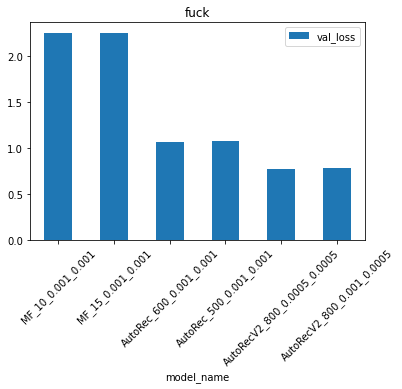

In [69]:
best_df.plot.bar(x='model_name', y='val_loss', rot=45, **{'title':'fuck'})

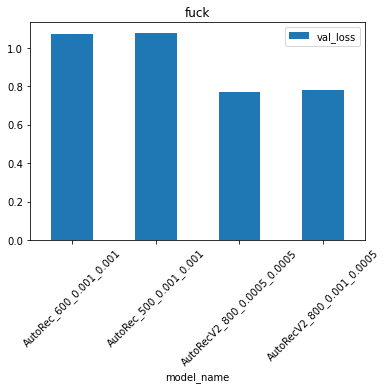

In [70]:

best_df[best_df.val_loss < 2].plot.bar(x='model_name', y='val_loss', rot=45, **{'title':'fuck'});